In [40]:
import os 
import cv2
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout
from keras.metrics import Precision, Recall, CategoricalAccuracy
from keras.models import load_model

In [2]:
# Avoiding OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

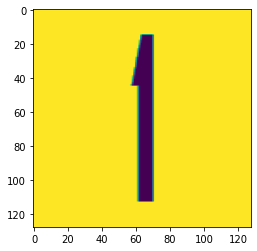

In [4]:
# Loading Data
data_dir = 'Data'
img = cv2.imread(os.path.join(data_dir,'1','img002-00001.png'))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))
plt.show()

In [6]:
# Creating Dataset
data = tf.keras.utils.image_dataset_from_directory(data_dir,color_mode='grayscale',image_size=(28,28),label_mode='categorical')

Found 10160 files belonging to 10 classes.


In [7]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
batch[0][0].shape

(28, 28, 1)

In [8]:
batch[1]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 

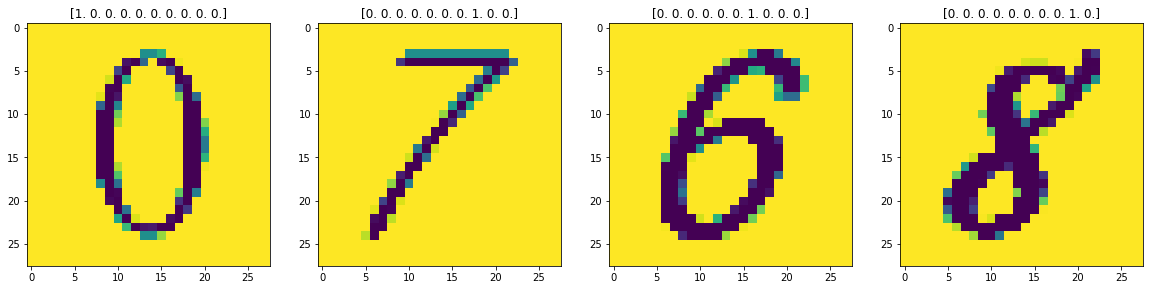

In [10]:
fig,ax = plt.subplots(ncols=4,figsize= (20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [11]:
# Normalizing data
data = data.map(lambda x,y:(x/255,y))

In [30]:
train_size = int(len(data)*0.7)
val_size  =int(len(data)*0.2)+1
test_size = int(len(data)*0.1)+1

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In [32]:
model = Sequential(
[
    # first set of CONV => RELU => Pool layers
    Conv2D(32,(5,5),padding = 'same',input_shape = (28,28,1),activation='relu'),
    MaxPooling2D(pool_size = (2,2)),

    # second set of CONV => RELU => POOL layers
    Conv2D(32,(3,3),padding = 'same',activation='relu'),
    MaxPooling2D(pool_size = (2,2)),

    # first set of FC => RELU layers
    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.5),

    # second set of FC => RELU layers
    Dense(64,activation='relu'),
    Dropout(0.5),

    # softmax classifier
    Dense(10,activation='softmax')
])
        
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [33]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
222/222 [==============================] - 16s 63ms/step - loss: 1.5266 - accuracy: 0.4462 - val_loss: 0.3229 - val_accuracy: 0.9375
Epoch 2/20
222/222 [==============================] - 15s 66ms/step - loss: 0.6983 - accuracy: 0.7515 - val_loss: 0.1254 - val_accuracy: 0.9722
Epoch 3/20
222/222 [==============================] - 13s 59ms/step - loss: 0.5359 - accuracy: 0.8102 - val_loss: 0.0961 - val_accuracy: 0.9756
Epoch 4/20
222/222 [==============================] - 12s 54ms/step - loss: 0.4342 - accuracy: 0.8470 - val_loss: 0.0716 - val_accuracy: 0.9819
Epoch 5/20
222/222 [==============================] - 12s 55ms/step - loss: 0.3818 - accuracy: 0.8685 - val_loss: 0.0685 - val_accuracy: 0.9800
Epoch 6/20
222/222 [==============================] - 13s 59ms/step - loss: 0.3438 - accuracy: 0.8805 - val_loss: 0.0593 - val_accuracy: 0.9844
Epoch 7/20
222/222 [==============================] - 13s 57ms/step - loss: 0.3239 - accuracy: 0.8858 - val_loss: 0.0481 - val_accuracy:

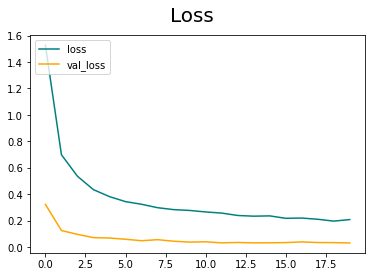

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'],color= 'teal',label = 'loss')
plt.plot(hist.history['val_loss'],color = 'orange',label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

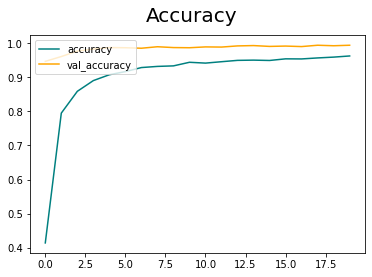

In [24]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color = 'teal',label = 'accuracy')
plt.plot(hist.history['val_accuracy'],color = 'orange',label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

In [36]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [37]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

In [38]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.991008996963501, Recall:0.9841269850730896, Accuracy:0.9871031641960144


In [41]:
model.save(os.path.join('Model','OCR.h5'))